## Filtering
### Averaging vs Median

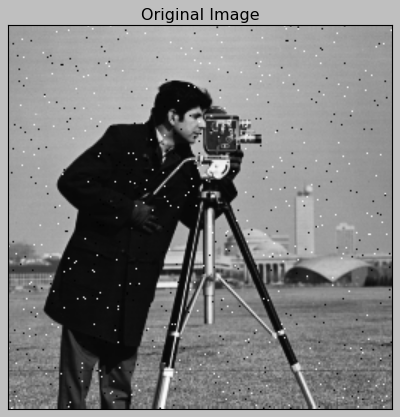

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("classic")

img = cv2.imread("Noisy_Cameraman.tif")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title("Original Image")
plt.show()

### Avergaing
Since it is a avergaing filter, $$Value\ of\  each\ Pixel = \frac{1}{Total\ number\ of\ Pixels}$$<br>Here we are using a 3x3 kernel. Hence the kernel will be
$$Kernel = \begin{pmatrix} \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\  \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\  \frac{1}{9} & \frac{1}{9} & \frac{1}{9}\end{pmatrix}$$

In [5]:
def masker_rgb(img,kernel):
    img_ = np.zeros(img.shape)
    kx,ky = kernel.shape
    kx,ky = int(kx/2),int(ky/2)
    for ch in range(3):
        for i in range(kx,img.shape[0]-kx):
            for j in range(ky,img.shape[1]-ky):
                #select = np.array([[img[i-1][j-1][ch],img[i-1][j][ch],img[i-1][j+1][ch]],
                                  #[img[i][j-1][ch],img[i][j][ch],img[i][j+1][ch]],
                                  #[img[i+1][j-1][ch],img[i+1][j][ch],img[i+1][j+1][ch]]])
                select = img[i-kx:i+kx+1,j-ky:j+ky+1,ch]
                img_[i][j][ch] = np.sum(kernel * select)
    return img_.astype(int)


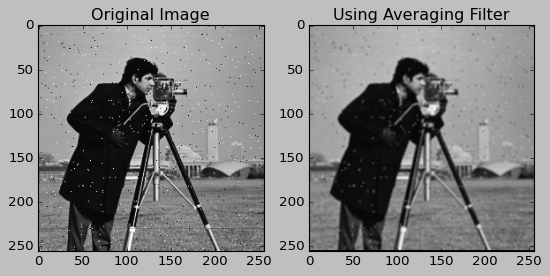

In [12]:
kernel = np.ones([3,3])/9
avg_img = masker_rgb(img.copy(),kernel)

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(avg_img)
plt.title("Using Averaging Filter")
plt.show()

### Median Filter
$$P_{x,y} = Median\begin{pmatrix} a_{x-1,y-1} & a_{x-1,y} & a_{x-1,y+1} \\ a_{x,y-1} & a_{x,y} & a_{x,y+1} \\ a_{x+1,y-1} & a_{x+1,y} & a_{x+1,y+1}\end{pmatrix}$$

In [9]:
def filtering_median(img,kernel):    
    img_ = np.zeros(img.shape)
    kx,ky = kernel.shape
    kx,ky = int(kx/2),int(ky/2)
    for ch in range(3):
        for i in range(kx,img.shape[0]-kx):
            for j in range(ky,img.shape[1]-ky):
                select = img[i-kx:i+kx+1,j-ky:j+ky+1,ch]
                img_[i][j][ch] = np.median(select)
    return img_.astype(int)

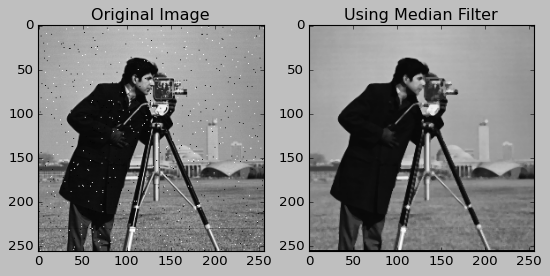

In [13]:
kernel = np.ones([3,3])
med_img = filtering_median(img.copy(),kernel)

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(med_img)
plt.title("Using Median Filter")
plt.show()

In conclusion, we can say that, Median Filtering works the best if we try to remove <b>Salt and Pepper Noise.</b> We can clearly see that, even for a small 3x3 averaging kernel, the noise is just blurred and even the output image is not desirable for any further operations, whereas, in Median filter, maximum information is retianed back and the Noise is also almost removed completely.